## Task 2: Predict Future Stock Prices (Short-Term)  
### Objective:  
Use historical stock data to predict the next day's closing price.  
### Dataset:  
Stock market data from Yahoo Finance (retrieved using the yfinance Python library)  
### Instructions:  
● Select a stock (e.g., Apple, Tesla).  
● Load historical data using the yfinance library.  
● Use features like Open, High, Low, and Volume to predict the next Close price.  
● Train a Linear Regression or Random Forest model.  
● Plot actual vs predicted closing prices for comparison. 

## Importing important Libraries

In [1]:
import yfinance as yf

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Loading Historical Stock Data (TSLA)

In [3]:
data = yf.download('TSLA', start='2020-01-01', end='2024-12-31')
data.reset_index(inplace=True)

C:\Users\kHaN\AppData\Local\Temp\ipykernel_11164\2404950233.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TSLA', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
1,2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2,2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
3,2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
4,2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


## Data Preprocessing

In [5]:
# Using past day's features to predict next day's Close
df = data[['Open', 'High', 'Low', 'Volume', 'Close']].copy()

In [6]:
# Shifting Close column to get the next day's Close as the target
df['Target'] = df['Close'].shift(-1)

In [8]:
# checking null values 
df.isnull().sum()

Price   Ticker
Open    TSLA      0
High    TSLA      0
Low     TSLA      0
Volume  TSLA      0
Close   TSLA      0
Target            1
dtype: int64

In [9]:
# dropping null values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Price   Ticker
Open    TSLA      0
High    TSLA      0
Low     TSLA      0
Volume  TSLA      0
Close   TSLA      0
Target            0
dtype: int64

In [17]:
# Define features and target
x = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target']

## Spliting data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
X_train.sample(4)

Price,Open,High,Low,Volume
Ticker,TSLA,TSLA,TSLA,TSLA
1253,435.899994,462.779999,435.140015,59551800
719,194.020004,195.199997,186.750000,128803400
238,191.456665,209.250000,188.779999,201249600
1171,209.720001,211.839996,202.589996,64116400


## Training a Regression Model

In [20]:
# making a class of linearregression
lr = LinearRegression()

In [23]:
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

## Training a Random Forest

In [24]:
# making class of Random Forest
rf = RandomForestRegressor()

In [25]:
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

## Models Evaluation

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

evaluate_model(Y_test, y_pred_lr, "Linear Regression")
evaluate_model(Y_test, y_pred_rf, "Random Forest")


Linear Regression Results:
Mean Squared Error: 84.05
R-squared: 0.99
Random Forest Results:
Mean Squared Error: 106.26
R-squared: 0.99


## Ploting actual vs predicted close prices

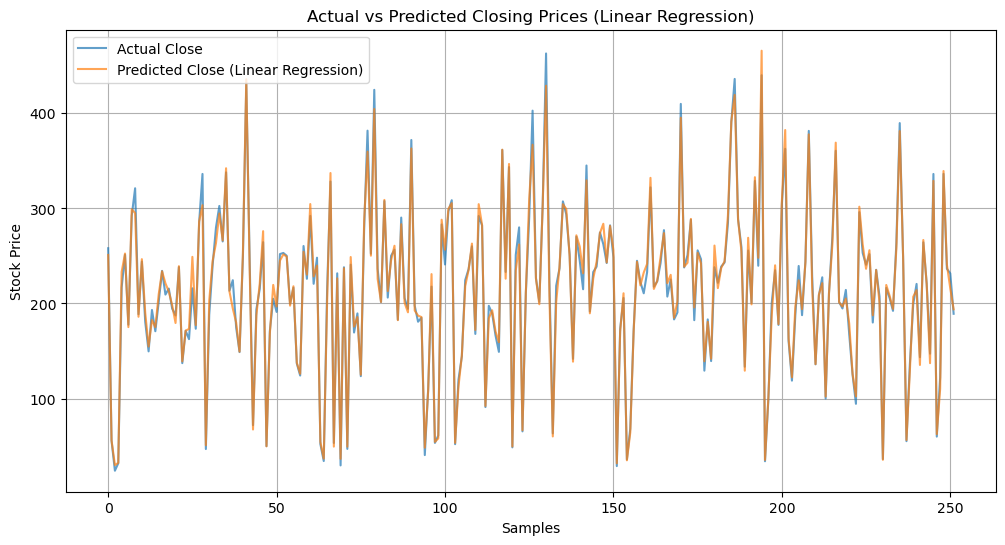

In [29]:
# Ploting actual vs predicted close price (Linear Regression)
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label='Actual Close', alpha=0.7)
plt.plot(y_pred_lr, label='Predicted Close (Linear Regression)', alpha=0.7)
plt.title("Actual vs Predicted Closing Prices (Linear Regression)")
plt.xlabel("Samples")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


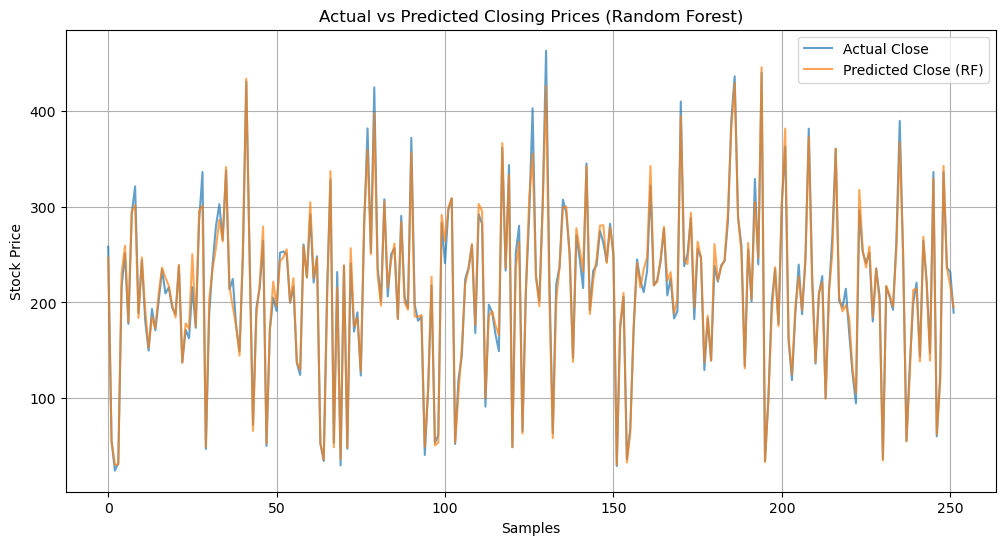

In [30]:
# Ploting actual vs predicted close price (Random Forest)
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close', alpha=0.7)
plt.plot(y_pred_rf, label='Predicted Close (RF)', alpha=0.7)
plt.title("Actual vs Predicted Closing Prices (Random Forest)")
plt.xlabel("Samples")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()
